<a href="https://colab.research.google.com/github/PratapArchit/Car-Rental-Feedback-Analyser/blob/main/Customer_Review_Analyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving customer_reviews.csv to customer_reviews.csv


In [18]:
import pandas as pd

df = pd.read_csv("customer_reviews.csv")
df.head()


,Customer ID,Review Text,Sentiment,Issues
0,1,The car was clean and comfortable but arrived ...,Neutral,late delivery
1,2,Excellent service and very friendly staff.,Positive,NaN
2,3,Horrible experience,Negative,vehicle breakdown
3,4,Car was dirty and smelled bad.,Negative,dirty car
4,5,Quick pick-up and drop-off,no complaints.,Positive


In [1]:
!pip install ibm-watson-machine-learning


In [8]:
from ibm_watson_machine_learning.foundation_models import ModelInference
from ibm_watson_machine_learning.foundation_models.utils.enums import ModelTypes
from ibm_watson_machine_learning.metanames import GenTextParamsMetaNames

wml_credentials = {
    "apikey": "hn37IZ_nGS9-sdMNZrGXEYwXVqSqaRHh07olqFqMNl6V",
    "url": "https://eu-de.ml.cloud.ibm.com"
}
project_id = "311ff138-8ad5-4d04-8373-f302f211f951"


In [11]:
url = "https://eu-de.ml.cloud.ibm.com"
apikey = "hn37IZ_nGS9-sdMNZrGXEYwXVqSqaRHh07olqFqMNl6V"
credentials = {
    "url": url,
    "apikey": apikey
}

In [12]:
from ibm_watson_machine_learning.foundation_models.utils.enums import ModelTypes
model_id = ModelTypes.FLAN_T5_XXL

model = ModelInference(
    model_id = model_id,
    credentials=credentials,
    project_id=project_id
)

/usr/local/lib/python3.11/dist-packages/ibm_watson_machine_learning/foundation_models/utils/utils.py:273: LifecycleWarning: Model 'google/flan-t5-xxl' is in deprecated state from 2025-05-28 until 2025-07-30. IDs of alternative models: None. Further details: https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/fm-model-lifecycle.html?context=wx&audience=wdp
  warnings.warn(default_warning_template.format(


In [25]:
few_shot_examples = [
    {"sentence": "The car was late and unclean.", "sentiment": "negative"},
    {"sentence": "The customer support was excellent.", "sentiment": "positive"},
    {"sentence": "The return process was okay.", "sentiment": "neutral"}
]

few_shot_prompt = "\n".join([
    f"Sentence: {ex['sentence']}\nSentiment: {ex['sentiment']}"
    for ex in few_shot_examples
])

def predict_sentiment(text):
    prompt = (
        f"{few_shot_prompt}\n\n"
        "Classify the sentiment of the following sentence.\n"
        "Respond with ONLY one word: Positive, Neutral, or Negative.\n\n"
        f"Sentence: {text}\nSentiment:"
    )
    params = {
        GenTextParamsMetaNames.MAX_NEW_TOKENS: 1,
        GenTextParamsMetaNames.TEMPERATURE: 0,
        GenTextParamsMetaNames.STOP_SEQUENCES: ["\n"]
    }

    result = model.generate_text(prompt=prompt, params=params)
    print("RAW RESULT:", result)
    return result.strip().capitalize()



In [26]:
df["predicted_sentiment"] = df["Review Text"].apply(predict_sentiment)


RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg
RAW RESULT: Neg
RAW RESULT: Positive
RAW RESULT: Neg


In [28]:
df.to_csv("customer_reviews_with_predictions.csv", index=False)
from google.colab import files
files.download("customer_reviews_with_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


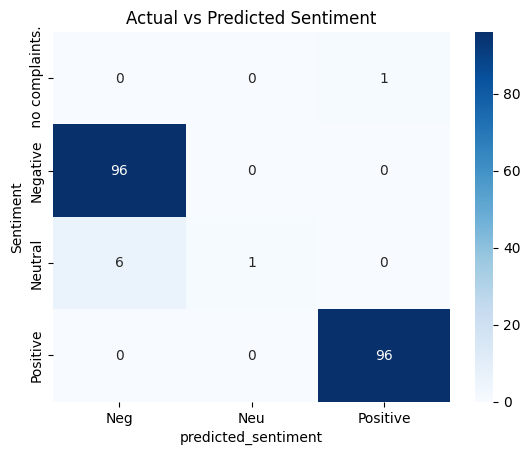

In [31]:
sns.heatmap(pd.crosstab(df["Sentiment"], df["predicted_sentiment"]), annot=True, fmt='d', cmap='Blues')
plt.title("Actual vs Predicted Sentiment")
plt.show()
